In [45]:
# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

# import the training sets

In [4]:
df = pd.read_csv('./datasets/BATADAL_dataset03.csv')
df2 = pd.read_csv('./datasets/BATADAL_dataset04.csv')
df2.columns = df2.columns.str.replace(' ', '')

# Fit model for First 5 pump flow signals

In [12]:
# change F_PU1 with F_PU values which work for order=(4,4)
signal = "F_PU7"
model = ARMA(df[signal], order=(4,4))
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Create prediction function

In [6]:
def predict(coefficent, history):
    res = 0.0
    for i in range(1, len(coefficent)+1):
        res += coefficent[i-1] * history[-i]
    return res

# Predict + Find Residuals

In [17]:
test = df2[signal]

ar_coefficients = model_fit.arparams
ma_coefficients = model_fit.maparams

resid = [x for x in model_fit.resid]
history = [x for x in df[signal]]

# start predicting!
predictions = list()
for t in range(len(test)):
    # next value prediction
    new_prediction = predict(ar_coefficients, history) + predict(ma_coefficients, resid)
    
    predictions.append(new_prediction)
    obs = test[t]
    history.append(obs)
    resid.append(obs-new_prediction)

# compute residuals
res = np.subtract(test, predictions)
res = res - np.mean(res)


# Plot Signals

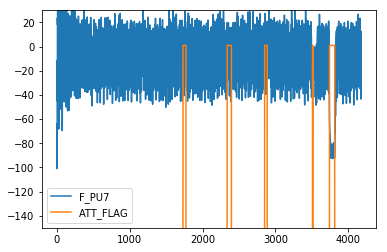

In [21]:

# plot residuals and the truth label
plt.plot(res)
plt.plot(df2['ATT_FLAG'])
axes = plt.gca()
axes.set_ylim([-150,30])
plt.legend()
plt.show()


# print predictions

In [23]:
print(len(df2['ATT_FLAG']))

4177
